In [1]:
from classy import Class

import matplotlib.pyplot as plt
import numpy as np

In [2]:
settings = {# LambdaCDM parameters
                    'output':'tCl,pCl,lCl,mPk',
                    'm_ncdm':0.06,
                    'N_ncdm':1,'N_ur':2.0328,
                    '100*theta_s': 1.041783,
                    'omega_b':0.022383,
                    'omega_cdm':0.12011,
                    'A_s':2.1005829616811546e-9,
                    'n_s':0.96605,
                    'tau_reio':0.0543,
                    'z_max_pk':900,
                    'lensing':'yes',
                    'l_max_scalars':3000}

In [3]:
#Compute the LCDM cosmology; note that the default value for f_dcdm is 0
#so as f_dcdm is not set in settings, it is set to 0
C = Class()
C.set(settings)
C.compute()
CLtt_lcdm = C.lensed_cl(3000)
k_for_pk = np.geomspace(1e-4,1,100)

Pk_lcdm = np.array([C.pk(k,np.atleast_1d(0))for k in k_for_pk])

H0_lcdm = 100*C.h()
S8_lcdm =  C.sigma8()

In [4]:
def compute_dmdr(f_dcdm,kappa_dcdm,a_t_dcdm,k_for_pk,fix_omch2_at_recombination=True,):
    C = Class()
    C.set(settings)
    
    settings_dcdm = {
                    'f_dcdm':f_dcdm,
                     'kappa_dcdm':kappa_dcdm,
                     'a_t_dcdm':a_t_dcdm,
                     }
    if fix_omch2_at_recombination:
        zcmb = 1100      #approximate the redshift of last scattering
        acmb = 1/(1+zcmb)
        omegach2 =  settings['omega_cdm']/(1+f_dcdm*(1-acmb**kappa_dcdm)/(1+(acmb/a_t_dcdm)**kappa_dcdm))
        settings_dcdm['omega_cdm'] = omegach2
#now we add these settings to C (the previous settings are kept)
    C.set(settings_dcdm)
    
    C.compute()   
    pks_dcdm = np.array([C.pk(k,np.atleast_1d(0))for k in k_for_pk])

    CLtt_dcdm = C.lensed_cl(3000)
    
    H0 = C.h()*100
    S8 = C.sigma8()
    
    return CLtt_dcdm,pks_dcdm,H0,S8

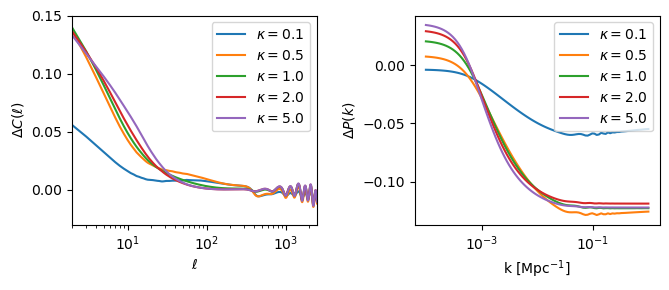

In [10]:
f     = 0.1
kappas = [0.1,0.5,1.0,2.0,5.0]
at    = 0.1

H0s={}
S8s={}
plt.figure(figsize=(7,3))
for kappa in kappas:
    CLtt_dmdr,pk_dmdr,H0_dmdr,S8_dmdr = compute_dmdr(f,kappa,at,k_for_pk)
    H0s[kappa] = H0_dmdr
    S8s[kappa] = S8_dmdr
    plt.subplot(121)
    plt.plot(CLtt_dmdr['ell'][2:],(CLtt_dmdr['tt']-CLtt_lcdm['tt'])[2:]/CLtt_lcdm['tt'][2:],label=r'$\kappa=$'+str(kappa))
    plt.subplot(122)
    plt.plot(k_for_pk,(pk_dmdr-Pk_lcdm)/Pk_lcdm,label=r'$\kappa=$'+str(kappa))
    
plt.subplot(121)
plt.legend()
plt.xscale("log")
plt.ylim(-0.03,0.15)
plt.xlim(2,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\Delta C(\ell)$')

plt.subplot(122)
plt.legend()
plt.xscale("log")
plt.xlabel(r'k [Mpc$^{-1}$]')
plt.ylabel(r'$\Delta P(k)$')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, '$S_8$ vs $H_0$')

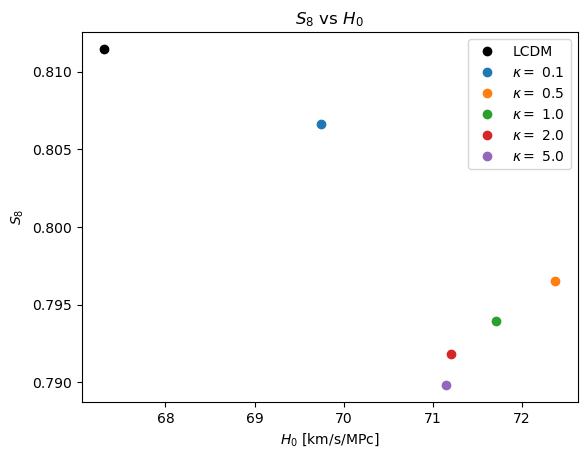

In [27]:
plt.plot([H0_lcdm],[S8_lcdm],'o',color='black',label='LCDM')

for kappa in kappas:
    plt.plot([H0s[kappa]],[S8s[kappa]],'o',label=r'$\kappa=$ '+str(kappa))
plt.legend()
plt.xlabel(r'$H_0$ [km/s/MPc]')
plt.ylabel(r'$S_8$')
plt.title(r'$S_8$ vs $H_0$')

In [18]:
H0s

{0.1: 69.74673202245134,
 0.5: 72.3740239820623,
 1.0: 71.71208558762557,
 2.0: 71.20342767075132,
 5.0: 71.14665702234895}